In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats



In [30]:
df_hbn = pd.read_csv('../data/HBN.csv')
df_hbn.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df = df_hbn [['BIA-BIA_Activity_Level_num','PreInt_EduHx-computerinternet_hoursday','BIA-Season','PreInt_EduHx-Season']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BIA-BIA_Activity_Level_num              1991 non-null   float64
 1   PreInt_EduHx-computerinternet_hoursday  3301 non-null   float64
 2   BIA-Season                              2145 non-null   object 
 3   PreInt_EduHx-Season                     3540 non-null   object 
dtypes: float64(2), object(2)
memory usage: 123.9+ KB


In [32]:
df = df[df['BIA-Season'] == df['PreInt_EduHx-Season']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 3955
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BIA-BIA_Activity_Level_num              751 non-null    float64
 1   PreInt_EduHx-computerinternet_hoursday  852 non-null    float64
 2   BIA-Season                              876 non-null    object 
 3   PreInt_EduHx-Season                     876 non-null    object 
dtypes: float64(2), object(2)
memory usage: 34.2+ KB


In [33]:
df = df.drop(['BIA-Season','PreInt_EduHx-Season'],axis = 1)
df.head()

,BIA-BIA_Activity_Level_num,PreInt_EduHx-computerinternet_hoursday
0,2.0,3.0
6,2.0,3.0
7,3.0,2.0
18,2.0,3.0
22,1.0,0.0


In [34]:
df = df.dropna()
df_more_than_2hours = df[df['PreInt_EduHx-computerinternet_hoursday'] >= 2]
df_less_than_2hours = df[df['PreInt_EduHx-computerinternet_hoursday'] < 2]
print(df_more_than_2hours.describe())
print(df_less_than_2hours.describe()) 


       BIA-BIA_Activity_Level_num  PreInt_EduHx-computerinternet_hoursday
count                  297.000000                              297.000000
mean                     2.468013                                2.235690
std                      0.982870                                0.425146
min                      1.000000                                2.000000
25%                      2.000000                                2.000000
50%                      2.000000                                2.000000
75%                      3.000000                                2.000000
max                      5.000000                                3.000000
       BIA-BIA_Activity_Level_num  PreInt_EduHx-computerinternet_hoursday
count                  433.000000                              433.000000
mean                     2.713626                                0.177829
std                      1.021176                                0.382811
min                      1.000000     

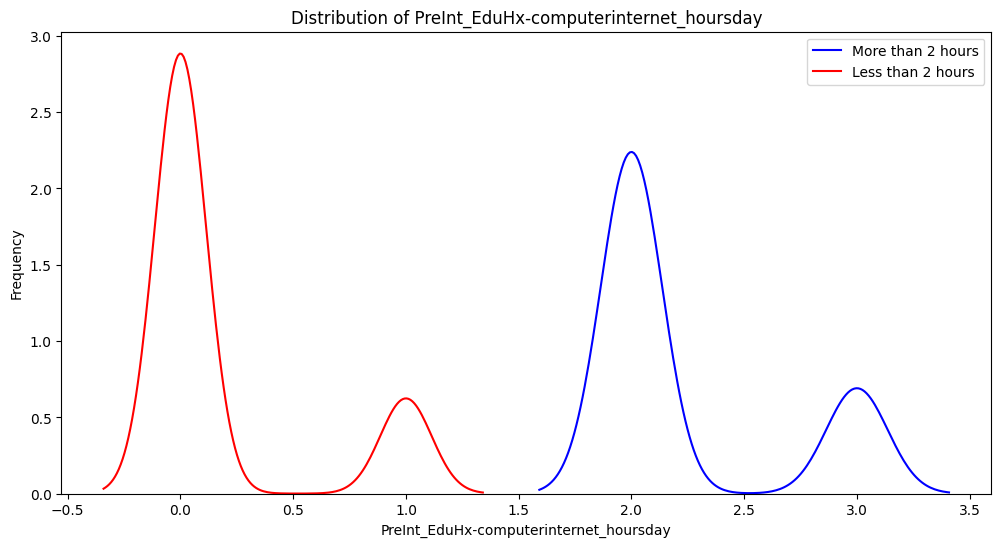

In [35]:
plt.figure(figsize=(12, 6))

sns.kdeplot(df_more_than_2hours['PreInt_EduHx-computerinternet_hoursday'], color='blue', label='More than 2 hours')


sns.kdeplot(df_less_than_2hours['PreInt_EduHx-computerinternet_hoursday'], color='red', label='Less than 2 hours')

plt.title('Distribution of PreInt_EduHx-computerinternet_hoursday')
plt.xlabel('PreInt_EduHx-computerinternet_hoursday')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [40]:
stat_more, p_more = stats.shapiro(df_more_than_2hours['BIA-BIA_Activity_Level_num'])
print(f"Shapiro-Wilk for >=2 hours: Stat={stat_more}, p={p_more}")

# For < 2 hours
stat_less, p_less = stats.shapiro(df_less_than_2hours['BIA-BIA_Activity_Level_num'])
print(f"Shapiro-Wilk for <2 hours: Stat={stat_less}, p={p_less}")

Shapiro-Wilk for >=2 hours: Stat=0.8948556976364798, p=1.749018859303419e-13
Shapiro-Wilk for <2 hours: Stat=0.9084948820863403, p=1.7020269862438095e-15


In [41]:
u_stat, p_value = stats.mannwhitneyu(df_more_than_2hours['BIA-BIA_Activity_Level_num'],
                                      df_less_than_2hours['BIA-BIA_Activity_Level_num'])
print(f"Mann-Whitney U: U-statistic={u_stat}, p-value={p_value}")

Mann-Whitney U: U-statistic=55622.5, p-value=0.0012036685980652336


In [24]:
df_apx  = df_hbn[['BIA-BIA_Activity_Level_num','PreInt_EduHx-computerinternet_hoursday']]
df_apx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BIA-BIA_Activity_Level_num              1991 non-null   float64
 1   PreInt_EduHx-computerinternet_hoursday  3301 non-null   float64
dtypes: float64(2)
memory usage: 62.0 KB


In [25]:
df_apx =df_apx.dropna(axis=0)

In [ ]:
df_apx_more_than_2hours = df_apx[df_apx['PreInt_EduHx-computerinternet_hoursday'] >= 2]
df_apx_less_than_2hours = df_apx[df_apx['PreInt_EduHx-computerinternet_hoursday'] < 2]

In [43]:
u_stat, p_value = stats.mannwhitneyu(df_apx_more_than_2hours['BIA-BIA_Activity_Level_num'],
                                      df_apx_less_than_2hours['BIA-BIA_Activity_Level_num'])
print(f"Mann-Whitney U: U-statistic={u_stat}, p-value={p_value}")

Mann-Whitney U: U-statistic=418981.5, p-value=0.018221436264837212
